In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from uncertainties import ufloat
from uncertainties.umath import *
import astropy.units as u


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-dark-palette')

/tmp/ipykernel_31410/1667230561.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [3]:
plt.rcParams["figure.figsize"]=8,6
plt.rcParams.update({'font.size': 16})

In [4]:
exoplanets = pd.read_csv('./data/exoplanetas_julio_22.csv')

In [5]:
# nuestros planetas
radio_1199 = [0.945*u.R_jup, 0.034*u.R_jup]
radio_1273 = [1.040*u.R_jup, 0.137*u.R_jup]
masa_1199 = [0.233*u.M_jup, 0.018*u.M_jup]
masa_1273 = [0.216*u.M_jup, 0.013*u.M_jup]

In [6]:
len(exoplanets)

2166

In [7]:
exoplanets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year',
       'disc_facility', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_ratror', 'pl_ratrorerr1',
       'pl_ratrorerr2', 'pl_ratrorlim', 'st_spectype',

In [8]:
parecidos = exoplanets[exoplanets.pl_orbper >= 1.0]
parecidos = parecidos[parecidos.pl_orbper <= 10.0]
parecidos = parecidos[parecidos.pl_bmasse >= 60.0]
parecidos = parecidos[parecidos.pl_bmasse <= 100.0]
parecidos = parecidos[parecidos.pl_bmasseerr1/parecidos.pl_bmasse <= 0.20]
parecidos = parecidos[parecidos.pl_bmasseerr2/parecidos.pl_bmasse >= -0.20]
#parecidos = parecidos[parecidos.pl_bmasseerr1 <= 10.0]
#parecidos = parecidos[parecidos.pl_bmasseerr2 >= -10.0]
parecidos.shape

(54, 76)

In [9]:
masas = np.linspace(50,110, 1000)
densidades=np.asarray([0.1,0.5,1.0,1.5,2.0, 1000])
cambio_de_unid = 1/0.01747765891
densidades = densidades*cambio_de_unid
radios1 = (3/(4*np.pi)*masas/densidades[0])**(1/3)
radios2 = (3/(4*np.pi)*masas/densidades[1])**(1/3)
radios3 = (3/(4*np.pi)*masas/densidades[2])**(1/3)
radios4 = (3/(4*np.pi)*masas/densidades[3])**(1/3)
radios5 = (3/(4*np.pi)*masas/densidades[4])**(1/3)
radios6 = (3/(4*np.pi)*masas/densidades[5])**(1/3)


In [10]:
#OTEGI 2020 M-R relation

radios7 = 0.70*masas**(0.63)*u.R_earth.to(u.R_jup)

/tmp/ipykernel_31410/809886865.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='pl_bmasse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


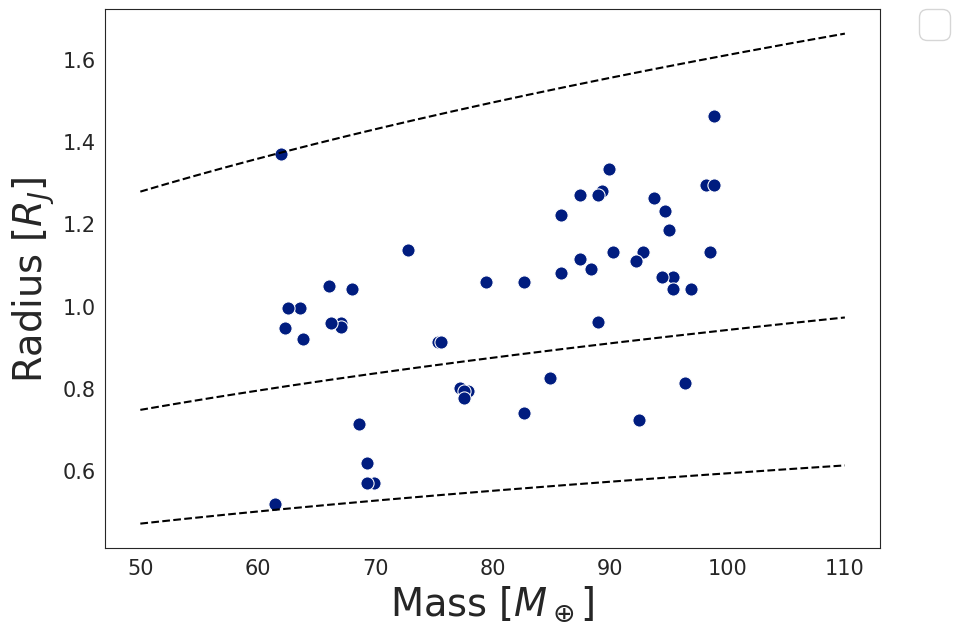

In [11]:
figure = plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.scatterplot(x='pl_bmasse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-large')
plt.xlabel('Mass [$M_\oplus$]', fontsize='xx-large')
plt.ylabel('Radius [$R_J$]', fontsize='xx-large')

plt.plot(masas,radios1, color='black', label='Density = 0.1', linestyle="--")
plt.plot(masas,radios2, color='black', label='Density = 0.5', linestyle="--")
#plt.plot(masas,radios3, color='red', label='Density = 100')
#plt.plot(masas,radios4, color='black', label='Density = 1.5')
plt.plot(masas,radios5, color='black', label='Density = 2.0', linestyle="--")
#plt.plot(masas,radios6, color='red', label='Density = 5')
# plt.xlim(60,100)
#plt.ylim(0.1,1.5)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)

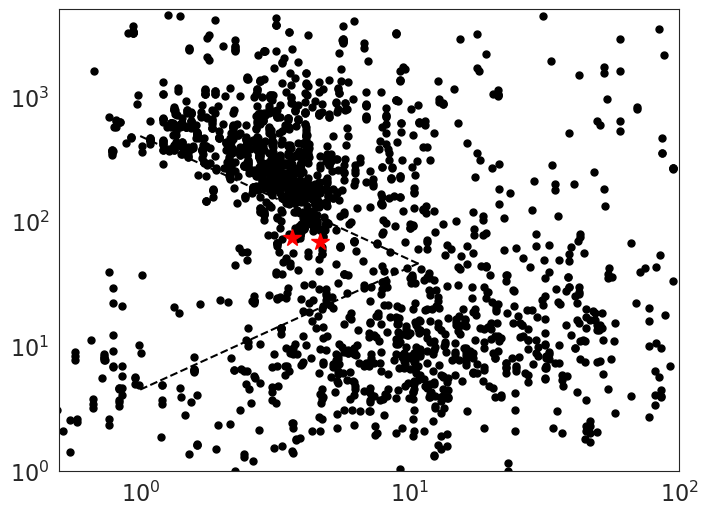

In [12]:
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,11,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_bmasse'], 'o', color='black', markersize=5)
plt.plot(x, 10**des1(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot(x, 10**des2(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot([3.67], [masa_1199[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [masa_1273[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,100)
plt.ylim(1,5000)
plt.show()

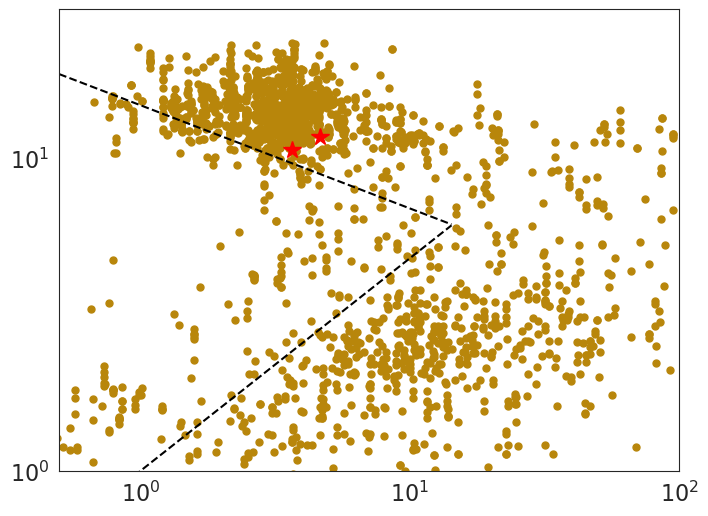

In [13]:
#neptunian desert in Period radius diagram
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(0.5,14.3,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=5)
plt.plot(x, 10**des3(np.log10(x)), color='black', linestyle='--')
plt.plot(x, 10**des4(np.log10(x)), color='black', linestyle='--')
plt.plot([3.67], [radio_1199[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [radio_1273[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5, 100)
plt.ylim(1, 30)
plt.show()

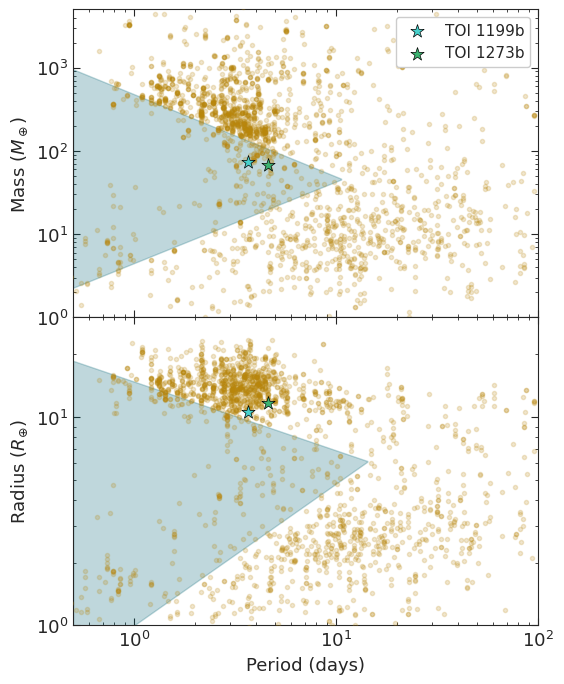

In [14]:
fig, axes = plt.subplots(2, sharex=True, sharey=False, figsize=(6,8))
fig.subplots_adjust(hspace=0)

x1=np.linspace(0.5,10.6,200)
y1=10**des1(np.log10(x1))*317.907
y2=10**des2(np.log10(x1))*317.907

axes[0].plot(exoplanets['pl_orbper'], exoplanets['pl_bmasse'], 'o', color='C4', markersize=3, alpha=0.2, zorder=9)
axes[0].scatter(3.67, masa_1199[0].to(u.M_earth).value, marker='*', edgecolors='k', linewidths=0.5, s=100, c='mediumturquoise', label='TOI 1199b', zorder=10)
axes[0].scatter(4.63, masa_1273[0].to(u.M_earth).value, marker='*', edgecolors='k', linewidths=0.5, s=100, c='mediumseagreen', label='TOI 1273b', zorder=10)
axes[0].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(0.5,100)
axes[0].set_ylim(1,5000)
axes[0].set_ylabel('Mass ($M_\oplus$)', fontsize=13)
axes[0].fill_between(x1, y1, y2, color='C5', alpha=0.25)
axes[0].legend(loc='upper right', fontsize=11, framealpha=1, frameon=True).set_zorder(11) 

x2=np.linspace(0.5,14.3,200)
y3=10**des3(np.log10(x2))
y4=10**des4(np.log10(x2))
axes[1].plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=3, alpha=0.2, zorder=9)
axes[1].scatter(3.67, radio_1199[0].to(u.R_earth).value, marker='*', edgecolors='k', linewidths=0.5, s=100, c='mediumturquoise', label='TOI 1199b', zorder=10)
axes[1].scatter(4.63, radio_1273[0].to(u.R_earth).value, marker='*', edgecolors='k', linewidths=0.5, s=100, c='mediumseagreen', label='TOI 1273b', zorder=10)
axes[1].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(0.5, 100)
axes[1].set_ylim(1, 30)
axes[1].set_xlabel('Period (days)', fontsize=13)
axes[1].set_ylabel('Radius ($R_{\oplus}$)', fontsize=13)
axes[1].fill_between(x2, y3, y4, color='C5', alpha=0.25)
#plt.savefig('desert_plot.png', dpi=300, bbox_inches='tight', facecolor='white')

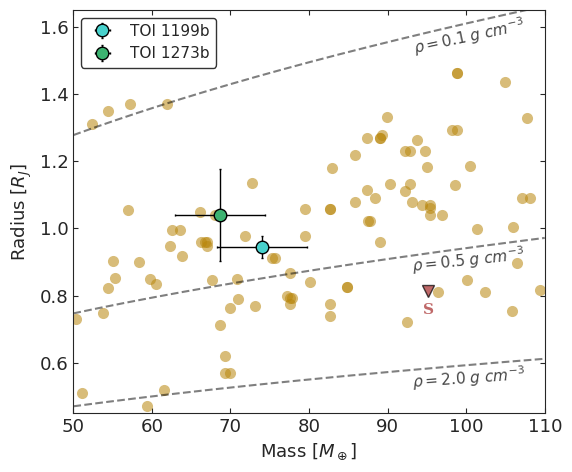

In [15]:
from curses.panel import bottom_panel

plt.figure(figsize=(6, 5))
plt.plot(exoplanets['pl_bmasse'], exoplanets['pl_radj'], 'o', color='C4', ms=8, 
        markeredgecolor='k', markeredgewidth=0, alpha=0.55)
# plt.errorbar(exoplanets['pl_bmasse'], exoplanets['pl_radj'], yerr=exoplanets['pl_radjerr1'], 
#             xerr=exoplanets['pl_bmasseerr1'], fmt='none', color='k', alpha=0.28, elinewidth=0.6)
plt.xlabel('Mass [$M_\oplus$]', fontsize=13)
plt.ylabel('Radius [$R_J$]', fontsize=13)
plt.plot(masas, radios1, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios2, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios5, color='black', linewidth=1.5, linestyle="--", alpha=0.5)

plt.errorbar([masa_1199[0].to(u.M_earth).value], [radio_1199[0].value], marker='o', ls='none', ms=9, color='mediumturquoise', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI 1199b')

plt.errorbar([masa_1273[0].to(u.M_earth).value], [radio_1273[0].value], marker='o', ls='none', ms=9, color='mediumseagreen', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1273[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI 1273b')

plt.plot([95.16], [0.8145], marker='v', ls='none', ms=8, color='brown', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
plt.text(94.53, 0.745, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='brown')

plt.tick_params(axis='both', labelsize=15)
plt.text(93, 1.52, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=11, rotation=12, alpha=0.85)
plt.text(93, 0.87, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=11, rotation=6, alpha=0.85)
plt.text(93, 0.525, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=11, rotation=4, alpha=0.85)

# plt.text(75.8, 0.98, 'TOI 1199b', fontsize=12, alpha=0.9, weight='black', fontfamily='serif', style='normal',  color='k',
#         bbox={'boxstyle':'round', 'pad':0.2, 'color':'C5','fc':'white', 'ec':'k', 'alpha':0.6})

# plt.text(57.30, 1.085, 'TOI 1273b', fontsize=12, alpha=0.9,  weight='black', fontfamily='serif', style='normal',  color='k',
#         bbox={'boxstyle':'round', 'pad':0.2, 'color':'C1','fc':'white', 'ec':'k', 'alpha':0.6})

plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
plt.xlim(50,110)
plt.ylim(0.45,1.65)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=11, frameon=True, edgecolor='k', fancybox=True, markerscale=1)
#plt.savefig('density_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

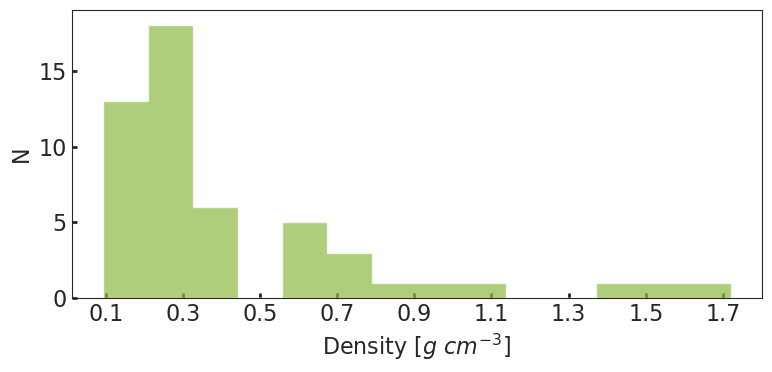

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(parecidos.pl_dens, bins=14, histtype='stepfilled', color='#8EBA42', alpha=0.7)
plt.xlabel('Density [$g~cm^{-3}$]')
plt.tick_params(axis='both', bottom=True, left=True, direction='in', width=2)
plt.xticks(np.arange(0.1, 1.8, 0.2))
#plt.yticks([])
plt.ylim(0,19)
plt.ylabel('N')
plt.tight_layout()
#plt.savefig('density_hist.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [17]:
exoplanets.columns

Index(['pl_name', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year',
       'disc_facility', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_ratror', 'pl_ratrorerr1',
       'pl_ratrorerr2', 'pl_ratrorlim', 'st_spectype',

(0.0, 2.0)

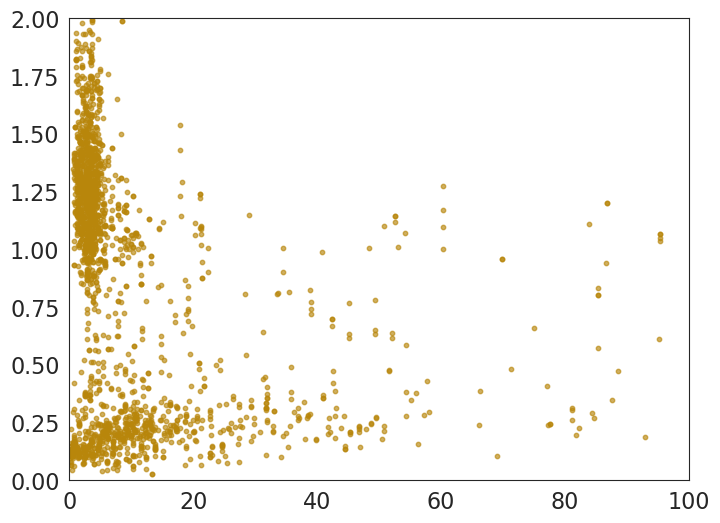

In [18]:
plt.scatter(exoplanets['pl_orbper'], exoplanets['pl_radj'], s=10, color='C4', alpha=0.65)
plt.xlim(0, 100)
plt.ylim(0, 2)

# BIS vs RVs    

In [19]:
data_11 = pd.read_table('./data/rvs/1199_final_rvs.dat', sep='\s+')
data_11.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_11 = np.array((data_11.rv-data_11.rv.mean())*1000)
yerr_rv_11 = np.array(data_11.err*1000)

data_12 = pd.read_table('./data/rvs/1273_final_rvs.dat', sep='\s+')
data_12.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_12 = np.array((data_12.rv-data_12.rv.mean())*1000)
yerr_rv_12 = np.array(data_12.err*1000)

In [20]:
print(data_11.bjd.min(), data_11.bjd.max())
print(data_12.bjd.min(), data_12.bjd.max())

58856.67683 59749.39015
58887.60797 59787.39647


In [31]:
# pearson coefficients between RVs and BIS
pearson_1199 = np.corrcoef(data_11.bis, data_11.rv)[0,1]
print(pearson_1199)
pearson_1273 = np.corrcoef(data_12.bis, data_12.rv)[0,1]
print(pearson_1273)


-0.02816499752996176
-0.060349928197486344


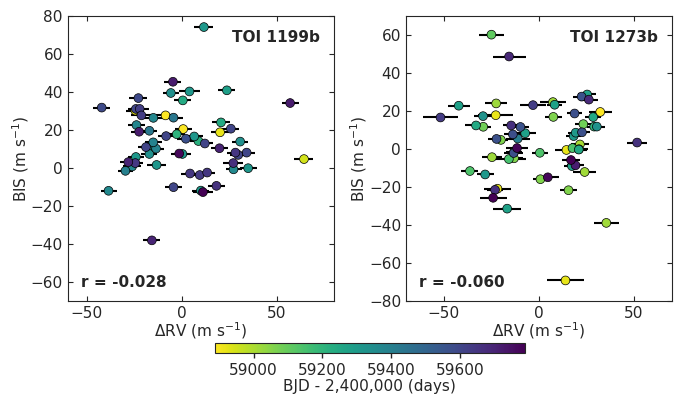

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
fig.subplots_adjust(wspace=0.20)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
g = axes[0].scatter(y_rv_11, data_11.bis*1e3, c=data_11.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI 1199b')
axes[0].errorbar(y_rv_11, data_11.bis*1e3, xerr=yerr_rv_11, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[0].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[0].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[0].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'semibold', 'size':'11'})
g = axes[1].scatter(y_rv_12, data_12.bis*1e3, c=data_12.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI 1273b')
axes[1].errorbar(y_rv_12, data_12.bis*1e3, xerr=yerr_rv_12, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[1].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[1].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11)
axes[1].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'demibold', 'size':'11'})
axes[0].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[0].set_xlim(-60, 80)
axes[0].set_ylim(-70, 80)
axes[1].set_xlim(-70, 70)
axes[1].set_ylim(-80, 70)
# show pearson coefficients in the plot at the bottom left
axes[0].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1199), transform=axes[0].transAxes, fontsize=11, weight='semibold')
axes[1].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1273), transform=axes[1].transAxes, fontsize=11, weight='semibold')
cbar =fig.colorbar(g, location='bottom', ax=axes.ravel().tolist(), shrink=0.5, aspect=30, pad=0.11)
cbar.ax.tick_params(labelsize=11, width=1)
cbar.set_label(label='BJD - 2,400,000 (days)', fontsize=11, labelpad=0.6)
#plt.savefig('bisrv.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()